In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_excel('Transpiration_Dwarf.xlsx')    
Data.dropna(inplace=True)

In [3]:
for i in Data.index:
    Data.loc[i,'Date'] = datetime.datetime.strptime(str(Data.loc[i,'Year'])+ ' ' +
                                                        str(Data.loc[i,'day'])+ ' ' +
                                                        str(Data.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')

In [4]:
Data.set_index('Date',inplace=True)
Data.drop(columns=['day','Year','hhmm'],inplace=True)


In [5]:
Data = Data.reindex(pd.date_range(Data.index.min(),Data.index.max(),freq='30min'))

In [6]:
RowSpace = 3.5
TreeSpace = 1.5
#Sum up complete days.  I.E dont cound days where radiation recore is incomplete
#sum up tree water use daily, divide by 2 to account for measurements every 30 min, divide by area per tree to give mm
DailyData = Data.resample('D').apply(lambda x: x.sum(skipna=False)/ 2 /(RowSpace*TreeSpace))
DailyData.where(DailyData>0,np.nan,inplace=True)
DailyData.columns=['EP(mm)']

In [7]:
PET = pd.read_pickle('..\Weather\WhakatuMet.pkl').loc[:,('Date','PET')].set_index('Date').loc[DailyData.index]

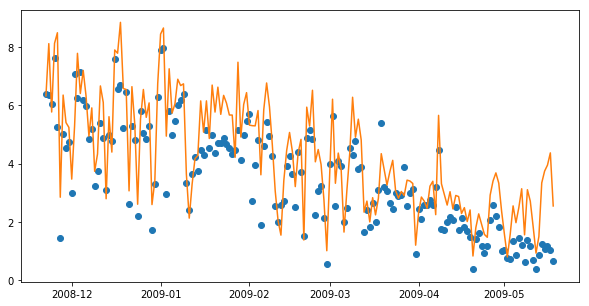

In [8]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(DailyData,'o')
plt.plot(PET,'-')

Text(0.5,0,'Potential ET (mm)')

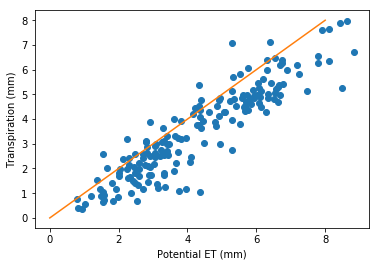

In [9]:
plt.plot(PET,DailyData,'o')
plt.plot([0,8],[0,8])
plt.ylabel('Transpiration (mm)')
plt.xlabel('Potential ET (mm)')

In [10]:
DailyData = pd.concat([DailyData],keys=['Dwarf'],names=['Crop'])

In [11]:
DailyData.to_pickle('Transpiration.pkl')